# Trajectories Analysis

It is supposed to be a problem with the trajectories of $\sigma$ = 0.9 and 0.98. It is seen they do not follow the potential landscape velocity. Specifically, the reported parameters are for $\sigma$ = 0.9, N = 6 and N = 14.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spo

import pims
import pint

from tqdm import tqdm_notebook as prog_bar

import support as sp

idx = pd.IndexSlice
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [8]:
# From https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

mpl.rcParams.update({'figure.dpi': 200})

mpl.rcParams.update({'font.size': 10})

ureg = pint.UnitRegistry()
column = 18*ureg.cm

In [2]:
directory = r"Z:\BASEP\Datasets\Test_u0_cte"
trj_directory = r"Z:\BASEP\Datasets\Test_u0_cte\Trajectories" #Directory of trajectories

In [3]:
index = pd.read_csv(directory+'\\'+"index.dat", sep="\t", index_col = [0,1])
index.head()

Filename  omega  radius  wavelength
sigma N_particles                                            
0.98  27.0         Test20_20190617   0.72   17.43        4.18
      26.0         Test21_20190617   0.72   17.43        4.18
      23.0         Test22_20190617   0.72   17.43        4.18
      20.0         Test23_20190617   0.72   17.43        4.18
      17.0         Test24_20190617   0.72   17.43        4.18

In [118]:
s = 0.9
n = 14

#filename = r"C:\Users\Eric\Documents\Projects\BASEP\Trajectories\Trajectory_sigma09np14.dat"
filename = trj_directory+r"\Trajectory_"+index.loc[idx[s,n], "Filename"]

trj = sp.trjLoading(filename+".dat")
trj = sp.movementAnalyser(trj, index.loc[idx[s,n],"omega"])
trj.head()

x           y  time           r     theta  \
frame particle                                                      
0     0        -16.565928 -104.369528   0.0  105.676054 -1.728207   
      1          8.076214  104.395524   0.0  104.707453  1.493588   
      2        -36.163765   98.243272   0.0  104.687909  1.923508   
      3         49.907026   93.339081   0.0  105.843731  1.079787   
      4         73.162798   75.941666   0.0  105.451087  0.804033   

                theta_unwrap  theta_dot  theta_prime  theta_prime_unwrap  \
frame particle                                                             
0     0            -1.728207        NaN     4.554978            4.554978   
      1             1.493588        NaN     1.493588            1.493588   
      2             1.923508        NaN     1.923508            1.923508   
      3             1.079787        NaN     1.079787            1.079787   
      4             0.804033        NaN     0.804033            0.804033   

                theta_dot_prime  
frame particle                   
0     0                     NaN  
      1                     NaN  
      2                     NaN  
      3                     NaN  
      4                     NaN

Text(0.5, 1.0, '$\\sigma / \\lambda$ = 0.9, Number of particles = 14')

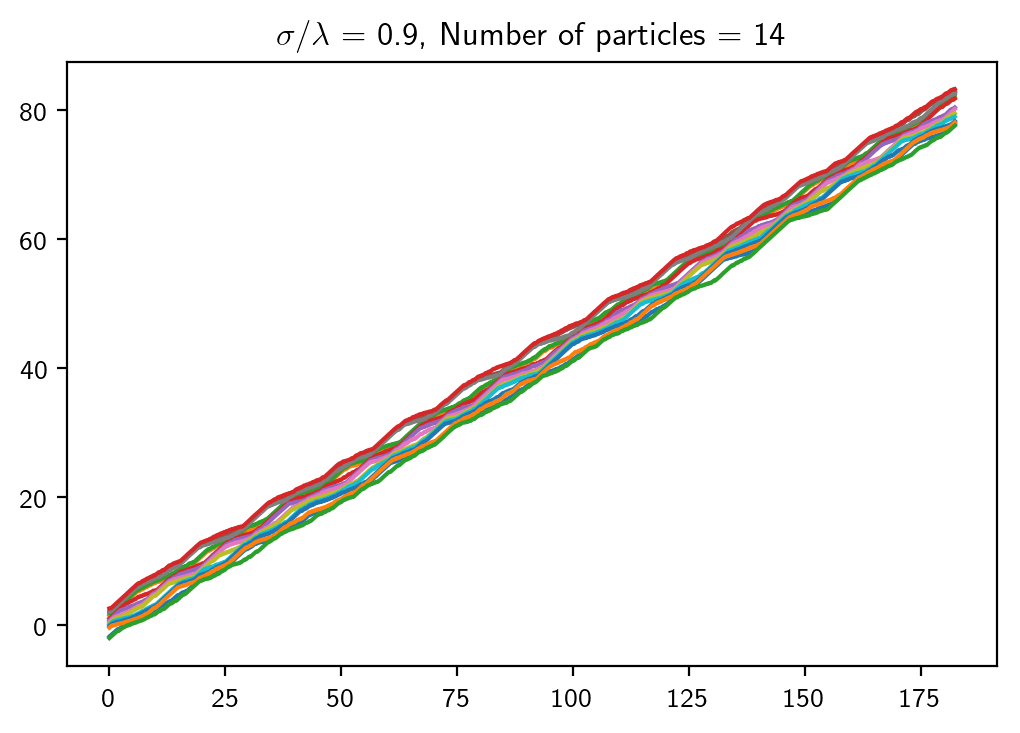

In [120]:
for p, trj_sub in trj.groupby("particle"):
    plt.plot(trj_sub.time, trj_sub.theta_unwrap)
    
plt.title("$\sigma / \lambda$ = {0}, Number of particles = {1}".format(s,n))
#plt.xlim([20,40]);

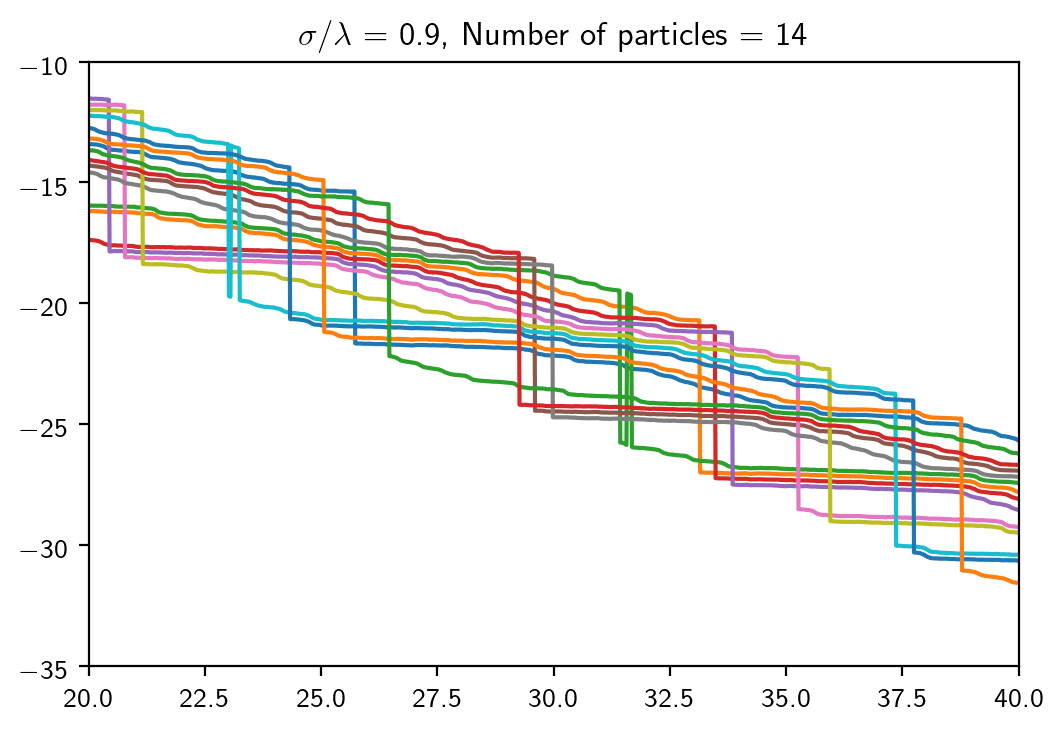

In [117]:
for p, trj_sub in trj2.groupby("particle"):
    plt.plot(trj_sub.time, trj_sub.theta)
    
plt.title("$\sigma / \lambda$ = {0}, Number of particles = {1}".format(s,n));
plt.ylim([-35,-10]);
plt.xlim([20,40]);